### 1. sklearn.linear_model.Ridge
_class_ sklearn.linear_model.Ridge(_alpha=1.0_,  _*_,  _fit_intercept=True_,  _normalize='deprecated'_,  _copy_X=True_,  _max_iter=None_,  _tol=0.001_,  _solver='auto'_,  _positive=False_,  _random_state=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/linear_model/_ridge.py#L910)[](https://scikit-learn.org/1.1/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge "Permalink to this definition")

### 2. sklearn.linear_model.Lasso
_class_ sklearn.linear_model.Lasso(_alpha=1.0_,  _*_,  _fit_intercept=True_,  _normalize='deprecated'_,  _precompute=False_,  _copy_X=True_,  _max_iter=1000_,  _tol=0.0001_,  _warm_start=False_,  _positive=False_,  _random_state=None_,  _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/linear_model/_coordinate_descent.py#L1134)[](https://scikit-learn.org/1.1/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso "Permalink to this definition")

In [19]:
from sklearn.linear_model import Ridge, Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

# boston 데이터셋 로드
boston_df = pd.read_csv('./datasets/Boston.csv')
boston_df.drop('Unnamed: 0', axis=1)
boston_df = boston_df.drop('Unnamed: 0', axis=1)
boston_df['Price'] = boston_df['medv']
boston_df = boston_df.drop('medv', axis=1)
boston_df
# boston dataset의 target array는 주택 가격, PRICE 컬럼으로 DataFrame에 존재
x = boston_df.drop('Price', axis = 1)
y = boston_df['Price']

In [20]:
# 릿지 클래스
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores :', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores : [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE 5.518


In [21]:
# 라쏘 클래스
lasso = Lasso(alpha=10)
neg_mse_scores = cross_val_score(lasso, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores :', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores : [-27.786 -46.397 -80.323 -61.56  -16.302]
 5 folds 의 개별 RMSE scores : [5.271 6.812 8.962 7.846 4.038]
 5 folds 의 평균 RMSE 6.586


In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores :', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores : [-12.46  -26.049 -33.074 -80.762 -33.314]
 5 folds 의 개별 RMSE scores : [3.53  5.104 5.751 8.987 5.772]
 5 folds 의 평균 RMSE 5.829


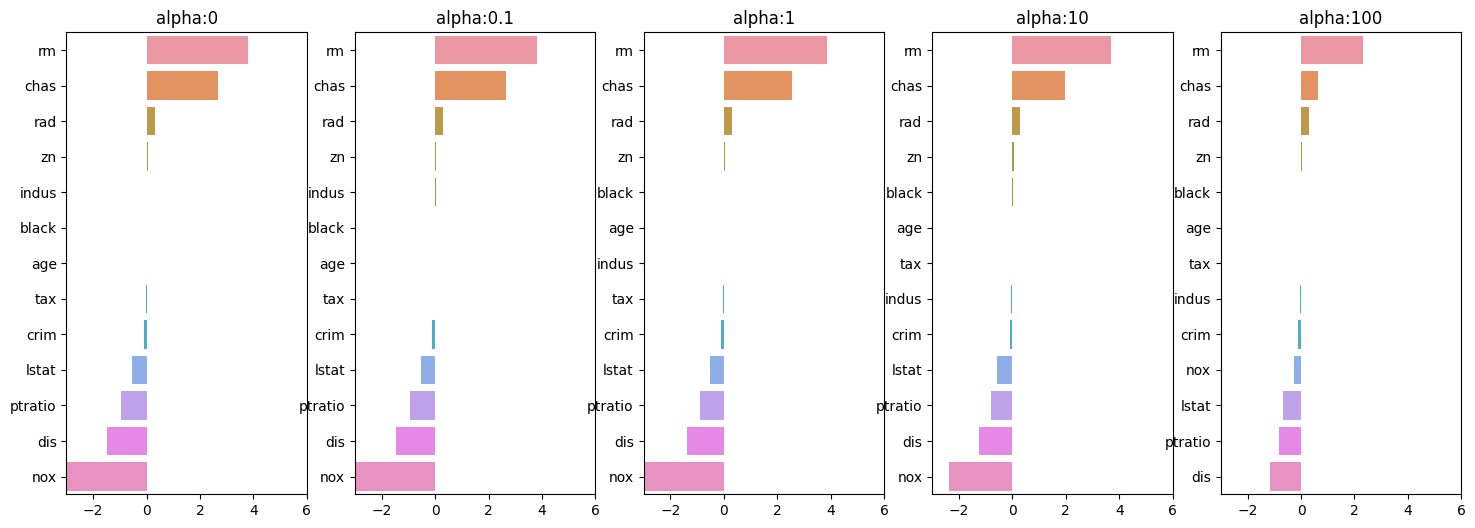

In [28]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 matplotlib 축 생성
import matplotlib.pyplot as plt
import seaborn as sns
alphas = [0, 0.1, 1, 10, 100]
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 데이터프레임 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x, y)
    # alpha에 따른 feature별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=x.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 회귀 계수 값이 높은 순으로 정렬
    axes[pos].set_title(colname)
    axes[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax= axes[pos])
    
    
# for문 바깥에서 matplotlib의 show 호출 및 alpha에 따른 feature별 회귀 계수를 DataFrame으로 표시
plt.show()


In [29]:
coeff

rm         2.334536
chas       0.638335
rad        0.315358
zn         0.054496
black      0.009393
age        0.001212
tax       -0.015856
indus     -0.052826
crim      -0.102202
nox       -0.262847
lstat     -0.660764
ptratio   -0.829218
dis       -1.153390
dtype: float64

C:\Users\Hong\AppData\Local\Temp\ipykernel_9264\50457355.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x, y)
C:\Users\Hong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.539e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mode

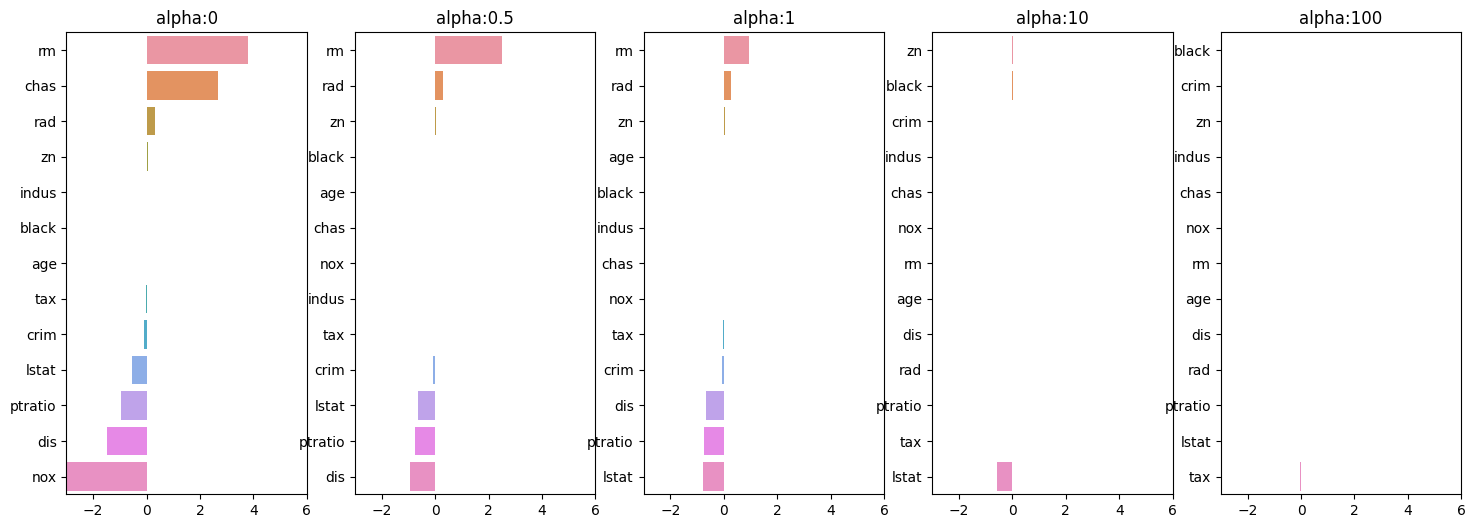

In [33]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
alphas = [0, 0.5, 1, 10, 100]
for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(x, y)
    # alpha에 따른 feature별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=lasso.coef_, index=x.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 회귀 계수 값이 높은 순으로 정렬
    axes[pos].set_title(colname)
    axes[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax= axes[pos])
    
    
# for문 바깥에서 matplotlib의 show 호출 및 alpha에 따른 feature별 회귀 계수를 DataFrame으로 표시
plt.show()

In [32]:
coeff

black      0.004466
crim      -0.000000
zn         0.000000
indus     -0.000000
chas       0.000000
nox       -0.000000
rm         0.000000
age       -0.000000
dis        0.000000
rad       -0.000000
ptratio   -0.000000
lstat     -0.000000
tax       -0.020972
dtype: float64

### 3. sklearn.linear_model.ElasticNet
_class_ sklearn.linear_model.ElasticNet(_alpha=1.0_, _*_, _l1_ratio=0.5_, _fit_intercept=True_, _normalize='deprecated'_, _precompute=False_, _max_iter=1000_, _copy_X=True_, _tol=0.0001_, _warm_start=False_, _positive=False_, _random_state=None_, _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/linear_model/_coordinate_descent.py#L680)[¶](https://scikit-learn.org/1.1/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elasti#sklearn.linear_model.ElasticNet "Permalink to this definition")

In [36]:
from sklearn.linear_model import ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀계수값들을 DataFrame으로 반환해주는 함수
def get_linear_reg_eval(model_name, params=None, x_n=None, y_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose :print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNat' : model = ElasticNet(alpha=param, ll_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x_n, y_n, scoring='neg_mean_squared', cv=5)
        
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일때 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(x, y)
        # alpha에 따른 feature별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
        coeff = pd.Series(data=lasso.coef_, index=x.columns)
        colname = 'alpha:' + str(alpha)
        coeff_df[colname] = coeff
    return coeff_df

In [37]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_n=x, y_n=y)

####### Lasso #######


ValueError: 'neg_mean_squared' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.